In [3]:
import torch
import matplotlib.pyplot as plt


# exo1
def generate_data_R1(nb_samples):
    data_inputs = torch.rand(nb_samples)
    weight = 0.4
    intercept = 0.5
    bruit = torch.normal(mean=0.0, std=0.01, size=(nb_samples,))
    data_outputs = weight * data_inputs + intercept + bruit
    return data_inputs, data_outputs


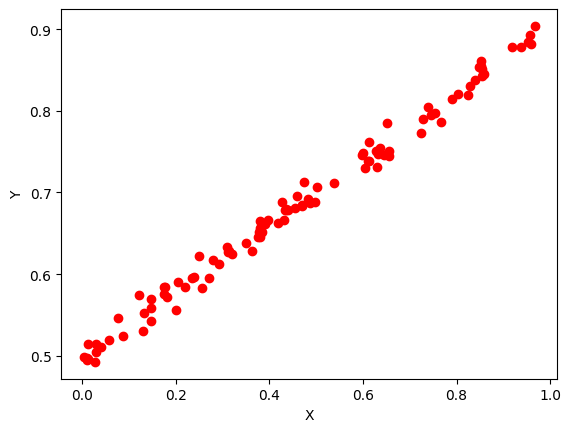

In [4]:
inputs, outputs = generate_data_R1(100)
fig2 = plt.figure(num="Regression lineaire avec poids aleatoires")
ax2 = fig2.add_subplot()
ax2.scatter(inputs, outputs, c="red")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [5]:
def model_ws(x, weight, bias):
    return weight * x + bias
weight = torch.rand(1)
bias = torch.rand(1)
x = torch.linspace(0.,1.,20)
y = model_ws(x, weight, bias)
ax2.plot(x,y,c='blue')
plt.show()


In [6]:
def loss_function(output, y):
    return torch.mean((output - y) ** 2)


def f(weight, bias):
    predicted = model_ws(inputs, weight, bias)
    return loss_function(outputs, predicted)

In [7]:
weight_values = torch.linspace(0,1,100)
bias_values = torch.linspace(0,1,100)
weight_mesh, bias_mesh = torch.meshgrid(weight_values, bias_values, indexing='ij')
# calculer la perte pour chaque x
loss_values = torch.zeros_like(weight_mesh)
for i in range(weight_mesh.size(0)):
    for j in range(weight_mesh.size(1)):
        loss_values[i, j] = f(weight_mesh[i, j], bias_mesh[i, j]).item()


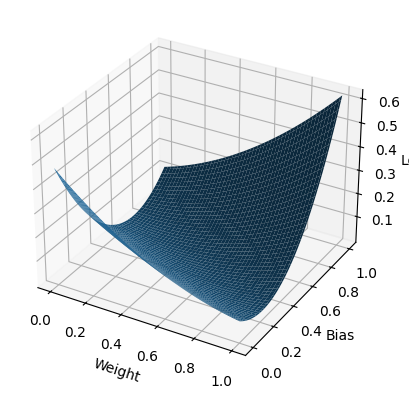

In [8]:
fig = plt.figure(num="Gradient descent")
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(weight_mesh, bias_mesh, loss_values)
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Loss')
plt.show()



In [9]:
# exo3
def df_dw(weight, bias): # calcul de la derivée partielle par rapport a weight
    return 2 * inputs * (weight * inputs + bias - outputs)

def df_db(weight, bias) : # calcul de la derivée partielle par rapport au biais
    return 2 * (weight * inputs + bias - outputs)

weight = torch.Tensor([2.0])
bias = torch.Tensor([1.0])
df_dw_moy = torch.mean(df_dw(weight, bias))
df_db_moy = torch.mean(df_db(weight, bias))
print(f"la dérivée moyenne de f par rapport à weight est {df_dw_moy}")
print(f"la dérivée moyenne de f par rapport au bias est {df_db_moy}")


la dérivée moyenne de f par rapport à weight est 1.3577053546905518
la dérivée moyenne de f par rapport au bias est 2.452890396118164


# exo4

In [10]:
lr = 0.5
epochs = 100
def grad_des(weight, bias, lr, epochs):
    for iter in range(epochs):
        #calcul des dérivées
        df_dw_moy = torch.mean(df_dw(weight, bias))
        df_db_moy = torch.mean(df_db(weight, bias))
        #ensuite on met à jour les parametres
        weight -= lr * df_dw_moy
        bias -= lr * df_db_moy
        loss = f(weight, bias)
        if iter % 10 == 0:
            print(f" la perte pour l'epoch {iter} est de : {loss}")
    return weight, bias


weight_des, bias_des = grad_des(weight, bias, lr, epochs)

 la perte pour l'epoch 0 est de : 0.15925967693328857
 la perte pour l'epoch 10 est de : 0.02243400178849697
 la perte pour l'epoch 20 est de : 0.006233949679881334
 la perte pour l'epoch 30 est de : 0.0017925042193382978
 la perte pour l'epoch 40 est de : 0.0005748302210122347
 la perte pour l'epoch 50 est de : 0.00024098949506878853
 la perte pour l'epoch 60 est de : 0.00014946266310289502
 la perte pour l'epoch 70 est de : 0.00012436955876182765
 la perte pour l'epoch 80 est de : 0.00011749004625016823
 la perte pour l'epoch 90 est de : 0.00011560387065401301


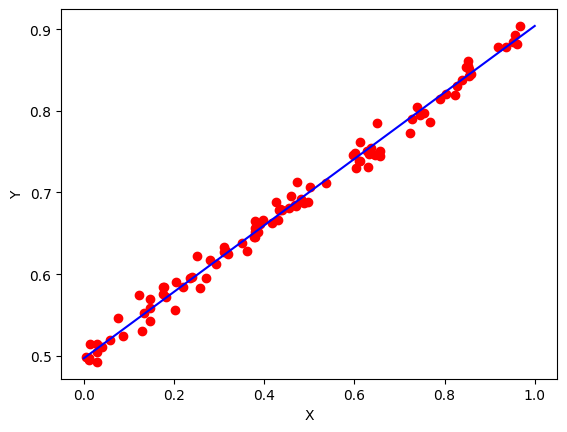

In [11]:
# dessiner la droite qui minimise la fonction d'erreur
fig3 = plt.figure(num="Regression lineaire grace à la descente gradient")
ax3 = fig3.add_subplot()
ax3.scatter(inputs, outputs, c="red")
plt.xlabel('X')
plt.ylabel('Y')
x = torch.linspace(0.,1.,20)
y = model_ws(x, weight_des, bias_des)
ax3.plot(x,y,c='blue')
plt.show()

# exo 5

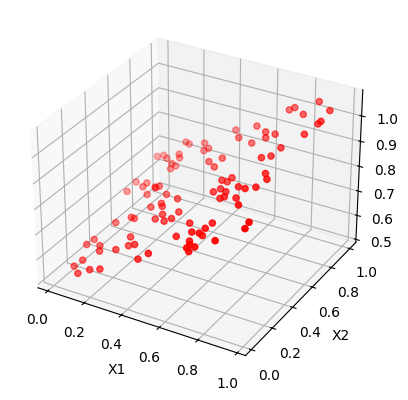

In [12]:
def generate_data_R2(nb_samples):
    X = torch.rand(nb_samples, 2)
    weight1 = 0.4
    weight2 = 0.2
    intercept = 0.5
    bruit = torch.normal(mean=0.0, std=0.01, size=(nb_samples,))
    y = weight1 * X[:,0] + weight2 * X[:, 1] + intercept + bruit
    return X, y

data_inputs2d, data_outputs2d = generate_data_R2(100)
fig1 = plt.figure(num="Visualisation 3D à 2 dimensions")
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter3D(data_inputs2d[:, 0], data_inputs2d[:,1], data_outputs2d, c="red")
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Y')
plt.show()

# exo 6

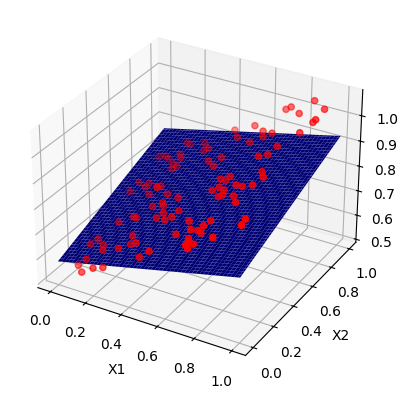

In [13]:
def model_ws2(X, weights, bias):
    return torch.matmul(weights, X) + bias
    
weights = torch.rand(2)
bias_2d = torch.rand(1)
x = torch.linspace(0.,1.,100)
X = torch.vstack([x,x])
X1, X2 = torch.meshgrid(x, x, indexing="ij") 

Z = torch.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X1.shape[0]):
        Z[i, j] = X1[i,j] * weights[0] + X2[i, j] * weights[1] + bias_2d


fig1 = plt.figure(num="Visualisation 3D à 2 dimensions")
ax1 = fig1.add_subplot( projection='3d')
ax1.scatter3D(data_inputs2d[:, 0], data_inputs2d[:,1], data_outputs2d, c="red")
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Y')
ax1.plot_surface(X1, X2, Z, color="blue")
plt.show()


# exo7

In [14]:
    
def f(weights, bias):
    predicted = model_ws2(X, weights, bias)
    return loss_function(data_outputs2d.view(-1, 1), predicted)
 

# exo 8

###### formule de retropropagation pour calcul de derivée par rapport a w ​= 2/N * sum (​(y^​i​−yi​)⋅xi)
###### //////////////////////////////////////////////////////////////// bias = 2/N * sum (​(y^​i​−yi​)

In [15]:

def df_dw(weight, bias) : # calcul de la derivée partielle par rapport au biais
    return 2 * data_inputs2d * (torch.matmul( data_inputs2d, weight.view(-1, 1) ) + bias - data_outputs2d.view(-1, 1))



"""
def df_dw(weight, bias):
    # calcul de la derivée partielle par rapport a weight 2D en utilisant la formule de retropropagation
    predictions = model_ws2(data_inputs2d.t(), weight.t(), bias)
    diff = predictions - data_outputs2d
    return 2 * torch.matmul(diff, data_inputs2d) / len(data_outputs2d)
"""

def df_db(weight, bias) : # calcul de la derivée partielle par rapport au biais
    return 2 * (torch.matmul(data_inputs2d, weight.view(-1, 1)) + bias - data_outputs2d.view(-1, 1))


"""
def df_db(weight, bias):
    # calcul de la derivée partielle par rapport a bias
    predictions = model_ws2(data_inputs2d.t(), weight.t(), bias)
    diff = predictions - data_outputs2d
    return 2 * torch.mean(diff)
"""

'\ndef df_db(weight, bias):\n    # calcul de la derivée partielle par rapport a bias\n    predictions = model_ws2(data_inputs2d.t(), weight.t(), bias)\n    diff = predictions - data_outputs2d\n    return 2 * torch.mean(diff)\n'

In [16]:
weight = torch.tensor([1., 2.])
bias= torch.tensor([3.])
df_dw_value = torch.mean(df_dw(weight, bias), axis = 0)
df_db_value = torch.mean(df_db(weight, bias), axis = 0)

# verification des dérivées partielles
print("df_dw:", df_dw_value)
print("df_db:", df_db_value)


df_dw: tensor([3.5492, 3.8945])
df_db: tensor([7.3257])


# exo 9 

In [17]:
lr = 0.5
epochs = 100
def grad_des(weight, bias, lr, epochs):
    for iter in range(epochs):
        #calcul des dérivées
        df_dw_moy = torch.mean(df_dw(weight, bias), axis=0)
        df_db_moy = torch.mean(df_db(weight, bias), axis=0)
        #ensuite on met à jour les parametres
        weight -= lr * df_dw_moy
        bias -= lr * df_db_moy
        loss = f(weight, bias)
        if iter % 10 == 0:
            print(f" la perte pour l'epoch {iter} est de : {loss}")
    return weight, bias


weight_des, bias_des = grad_des(weight, bias, lr, epochs)


 la perte pour l'epoch 0 est de : 3.336387872695923
 la perte pour l'epoch 10 est de : 0.0390046164393425
 la perte pour l'epoch 20 est de : 0.04141865670681
 la perte pour l'epoch 30 est de : 0.04321654886007309
 la perte pour l'epoch 40 est de : 0.04444951191544533
 la perte pour l'epoch 50 est de : 0.0452403649687767
 la perte pour l'epoch 60 est de : 0.04572832211852074
 la perte pour l'epoch 70 est de : 0.046022363007068634
 la perte pour l'epoch 80 est de : 0.046196918934583664
 la perte pour l'epoch 90 est de : 0.04629959166049957


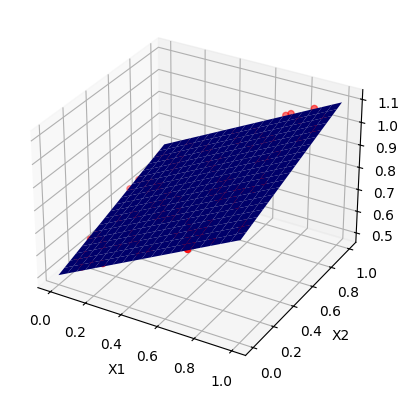

In [29]:

x = torch.linspace(0.,1.,20)
#X = torch.vstack([x,x])
X1, X2 = torch.meshgrid(x, x) 

Y = torch.zeros(X1.shape)

for i in range(X1.shape[0]):
    for j in range(X1.shape[0]):
        Y[i, j] = X1[i,j] * weight_des[0] + X2[i, j] * weight_des[1] + bias_des


fig1 = plt.figure(num="Visualisation 3D à 2 dimensions")
ax1 = fig1.add_subplot( projection='3d')
ax1.scatter3D(data_inputs2d[:, 0], data_inputs2d[:,1], data_outputs2d, c="red")
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Y')
ax1.plot_surface(X1, X2, Y, color="blue")
plt.show()

# exo 10

In [30]:
def f(weights, bias):
    predicted = model_ws2(X, weights, bias)
    return loss_function(data_outputs2d.view(-1, 1), predicted)
    
weight = torch.tensor([1., 2.], requires_grad = True)
bias= torch.tensor([3.], requires_grad = True)    


loss = f(weight, bias)
print(loss)
# calcul des grads avc autograd
loss.backward()
# affichage des resultats affichés par autograd 
print("resultat du weight calculé par autograd :",weight.grad.detach().numpy()) 
print("resultat du bias calculé par autograd :", bias.grad.detach().numpy())
# calcul des poids avec nos fonctions
df_dw_w = torch.mean(df_dw(weight,bias), axis = 0)
df_db_b = torch.mean(df_db(weight,bias), axis = 0)
# affichage des resultats affichés par nos fonctions
print("resultat du weight calcilé par df_dw :", df_dw_w.detach().numpy()) 
print("resultat du bias calculé par df_db :", df_db_b.detach().numpy())

tensor(14.5725, grad_fn=<MeanBackward0>)
resultat du weight calculé par autograd : [4.2238073 4.2238073]
resultat du bias calculé par autograd : [7.427414]
resultat du weight calcilé par df_dw : [3.549158  3.8945117]
resultat du bias calculé par df_db : [7.3257375]


# exo 11

In [31]:
lr = 0.5
epochs = 100

def grad_des(weight, bias, lr, epochs):
    for iter in range(epochs):
        
        #forward pass
        loss = f(weight, bias)
        #backward pass
        loss.backward()
        #update 
        with torch.no_grad():
            weight -= lr * weight.grad
            bias -= lr * bias.grad
        # prevent accumulation by zeroing the grad
        weight.grad.zero_()
        bias.grad.zero_()   

        if iter % 10 == 0:
            print(f" la perte pour l'epoch {iter} est de : {loss}")
    return weight, bias

weight_grad, bias_grad = grad_des(weight, bias, lr, epochs)

 la perte pour l'epoch 0 est de : 14.572470664978027
 la perte pour l'epoch 10 est de : 0.018376069143414497
 la perte pour l'epoch 20 est de : 0.015769708901643753
 la perte pour l'epoch 30 est de : 0.015708502382040024
 la perte pour l'epoch 40 est de : 0.01570240594446659
 la perte pour l'epoch 50 est de : 0.01570179872214794
 la perte pour l'epoch 60 est de : 0.015701739117503166
 la perte pour l'epoch 70 est de : 0.01570173352956772
 la perte pour l'epoch 80 est de : 0.01570173166692257
 la perte pour l'epoch 90 est de : 0.01570172980427742


tensor([-0.5000,  0.5000], requires_grad=True)

torch.Size([20])